# Test 1
## Sorting lines based on the xml files

In [1]:
!ls ../../edspdf-train/data/publaynet/

dev.json xmls


In [2]:
%load_ext autoreload
%autoreload 2

import sys
sys.executable

'/Users/souleymbaye/opt/anaconda3/envs/eds_env/bin/python'

In [3]:
base_dir = '../../edspdf-train/data/publaynet/'

## Model extractor

In [4]:
from edspdf import Pipeline

model = Pipeline()
model.add_pipe("pdfminer-extractor", config=dict(extract_style="true"), name="extractor")

## Visualize a pdf and xml

## XPath

In [5]:
import io
import pydotplus
import elementpath
from lxml import etree
from copy import deepcopy
from graphviz import Source
from IPython.display import display, Image

### Fonctions d'affichage

In [6]:
xslt_dir = '../../edspdf-train/data/xslt/'

In [7]:

def printXML(element):
    # print(isinstance(element, etree._ElementTree))
    t = element if isinstance(element, etree._ElementTree) else etree.ElementTree(element)
    # t=etree.ElementTree(element)
    str=etree.tostring(t, pretty_print=True, encoding='unicode')
    print(str)
    # return str
def node_XML_to_str(element):
    # print(isinstance(element, etree._ElementTree))
    t = element if isinstance(element, etree._ElementTree) else etree.ElementTree(element)
    # t=etree.ElementTree(element)
    str=etree.tostring(t, pretty_print=True, encoding='unicode')
    return str
 
        
def printXPath(xmltree,xp):
    # r=xmltree.xpath(xp)
    try:
        r=elementpath.select(xmltree,xp)
        print(f'Lenght {len(r)}')
        for x in r:
            printXML(x)
    except:
        print(f"error in expression ({xp}) or inputfile")
        

def displayXPath(xmltree,xp,pngfile="reponse"):
    # r=xmltree.xpath(xp)
    r=elementpath.select(xmltree,xp)
    reponse=etree.Element("reponse")
    for x in r:
        reponse.append(deepcopy(x))
    displayXMLInline(reponse)

    
def displayXML(t,pngfile="xpath"):
    f_xslt = open(f"{xslt_dir}xml2dot.xslt","r")
    xslt=etree.parse(f_xslt)
    transform = etree.XSLT(xslt)
    s_dot=transform(t)
    try:
        s=Source(str(s_dot),filename="gendata/"+pngfile+".dot", format="png")
    except:
        print("install graphviz")
        print(etree.tostring(t, pretty_print=True, encoding='unicode'))
    s.view()
    
def displayXMLInline(t):
    f_xslt = open(f"{xslt_dir}xml2dot.xslt","r")
    xslt=etree.parse(f_xslt)
    transform = etree.XSLT(xslt)
    s_dot=str(transform(t))
    # print(s_dot)
    # with io.StringIO(s_dot) as f:
    #    a=nx.nx_pydot.read_dot(f)
    try:
        dg = pydotplus.graph_from_dot_data(s_dot)
        png = dg.create_png()
        display(Image(png))
    except:
        print("install graphviz")
        print(etree.tostring(t, pretty_print=True, encoding='unicode'))
    # print(s_dot)
    # return s_dot

In [8]:
!ls ../../edspdf-train/data/publaynet/xmls/PMC1087887/

1477-9560-3-5-1.gif 1477-9560-3-5-1.jpg 1477-9560-3-5.nxml  1477-9560-3-5.pdf


In [8]:
from pathlib import Path

def get_paths(file_dir):

    file_dir = Path(file_dir)
    xml_path = next(file_dir.glob("*.nxml"))
    pdf_path = next(file_dir.glob("*.pdf"))
    
    return pdf_path, xml_path


### Example 2

In [4]:
!ls ../../edspdf-train/data/publaynet/xmls | head -n +5

PMC1087887
PMC1087888
PMC1241820
PMC1247186
PMC1247188


In [13]:
!ls ../../edspdf-train/data/publaynet/xmls/PMC1247188/

ehp0112-000959.nxml  ehp0112-000959f1.jpg ehp0112-000959f3.gif
ehp0112-000959.pdf   ehp0112-000959f2.gif ehp0112-000959f3.jpg
ehp0112-000959f1.gif ehp0112-000959f2.jpg


In [9]:
file_dir = base_dir + 'xmls/PMC1241820'
pdf_path, xml_path = get_paths(file_dir = file_dir)
print(f'xml path: {xml_path}\npdf path: {pdf_path}')


xml path: ../../edspdf-train/data/publaynet/xmls/PMC1241820/ehp0112-000126.nxml
pdf path: ../../edspdf-train/data/publaynet/xmls/PMC1241820/ehp0112-000126.pdf


#### Show annotations

In [10]:
from edspdf.structures import Box, PDFDoc
from edspdf.visualization.annotations import show_annotations

# Read PDF
pdf = pdf_path.read_bytes()
doc: PDFDoc = model.get_pipe("extractor")(pdf)

# pages = [page for page in show_annotations(doc.content, doc.content_lines)]
# for page in show_annotations(doc.content, doc.content_boxes):
#     display(page)

#### Display XML

In [19]:
# Read XML
xml = open(xml_path, 'rb')
tree = etree.parse(xml)
# root = tree.getroot()

printXML(tree)

<!DOCTYPE article PUBLIC "-//NLM//DTD JATS (Z39.96) Journal Archiving and Interchange DTD v1.0 20120330//EN" "JATS-archivearticle1.dtd">
<article xmlns:xlink="http://www.w3.org/1999/xlink" xmlns:mml="http://www.w3.org/1998/Math/MathML" article-type="article-commentary">
  <?properties open_access?>
  <front>
    <journal-meta>
      <journal-id journal-id-type="nlm-ta">Environ Health Perspect</journal-id>
      <journal-id journal-id-type="iso-abbrev">Environ. Health Perspect</journal-id>
      <journal-id journal-id-type="publisher-id">EHP</journal-id>
      <journal-title-group>
        <journal-title>Environmental Health Perspectives</journal-title>
      </journal-title-group>
      <issn pub-type="ppub">0091-6765</issn>
      <issn pub-type="epub">1552-9924</issn>
      <publisher>
        <publisher-name>National Institute of Environmental Health Sciences</publisher-name>
      </publisher>
    </journal-meta>
    <article-meta>
      <article-id pub-id-type="pmid">14754565</arti

In [12]:
from fuzzysearch import find_near_matches
from unidecode import unidecode
import string
from tqdm import tqdm
from operator import attrgetter

# mapped text boxes
for i,tb in enumerate(doc.content_boxes):
    tb.id = i # text box id
map_tboxes = {tb.id: tb for tb in doc.content_boxes}

print('Nb text boxes:',len(map_tboxes))
def delete_white_spaces(ch):
    for c in string.whitespace:
        ch = ch.replace(c,"")
    
    return ch

def tb_match_(target_text, source_text, d=0):
    len_target_text = len(target_text)
    # if len_target_text < 4 and len(source_text)>4: # text box that have no text
    #     return False
    
    pdmax = 0.2  if len_target_text<=20 else (\
            0.15 if len_target_text<=40 else \
            0.1)
    dmax = d + int(pdmax * len_target_text)
    
    #match
    ret = find_near_matches(target_text, source_text, max_l_dist=dmax)
    if len(ret)<1: return False

    # if len_target_text <= 4:
    #     end_m = ret[-1].end
    #     if end_m < len(source_text) - 2: return False
    
    # return True if len(ret) > 0 else False
    return ret if len(ret) > 0 else False

whitespaces = '-' + string.whitespace
def is_following(ret_av, ret):
    for m_av in ret_av:  # match at the start of the node
        for m in ret:
            # if m.start < m_av.end-m.dist: continue
            if abs(m.start - m_av.end) <= ( max(m_av.dist, m.dist)):
                return True

    return False

def get_matches(nodes, dict_page_text_boxes, color='black', bg_color='cyan', v=False):
    
    nodes_ok = {}
    dict_blocks = {} # {inode: blocks}
    for num_page in dict_page_text_boxes:
        page_text_boxes = dict_page_text_boxes[num_page]
        # dict_blocks = {} # {inode: blocks}
        
        for tb in page_text_boxes:
            for inode,node in enumerate(nodes):
                if inode in nodes_ok:
                    continue
                
                target_text = delete_white_spaces(unidecode(tb.text))
                if not target_text: continue
                source_text = delete_white_spaces(unidecode(" ".join(node.itertext())))
                # print(f'\ntarget `{tb.text}` : `{unidecode(tb.text)}` : `{target_text}`\nnode `{" ".join(node.itertext())}`')
                ret = tb_match_(target_text, source_text)
                if not ret:    # no match
                    continue

                val = dict_blocks.get(inode, None)  # (node, blocks)
                if val is None:
                    dict_blocks[inode] = (node,[[(tb,ret)]]) # node, list[list[(tb,ret)]]
                    continue
                
                blocks = val[1]
                block = None # find_block(tb, blocks)
                for b in blocks:
                    tb_av,ret_av = b[-1]
                    if inode == -67 and num_page==9:
                        print(f'\nFind bloc `{tb.text}`\n  node text {" ".join(node.itertext())}')
                        print(f'  tb av `{tb_av.text}` {tb_av}')
                        print(f'  tb text `{tb.text}` {tb}')
                    # bloc of a single page
                    if tb.page_num != tb_av.page_num: continue
                    if inode == -67 and num_page==9:
                        print('------page num ok------------')

                    tb1, tb2 = (tb_av,tb) if (tb_av.x0 <= tb.x0) else (tb,tb_av)
                    # on_line = True if (tb2.x0-0.015<=tb1.x1) else False
                    if (tb2.x0 > tb1.x1):
                        tb1_, tb2_ = (b[0][0],tb) if (b[0][0].x0 <= tb.x0) else (tb,b[0][0])
                        if (tb2_.x0 > tb1_.x1): continue
                    
                    if inode == -67 and num_page==9:
                        print('------align ok------------')

                    tb1, tb2 = (tb_av,tb) if (tb_av.y0 <= tb.y0) else (tb,tb_av)
                    if abs(tb2.y0 - tb1.y1) > 0.02: continue
                    if inode == -67 and num_page==9:
                        print('------tb2.y0 - tb1.y1 ok------------')

                    fl = is_following(ret_av, ret)
                    if fl:
                        block = b
                        break
                
                if inode == -67 and num_page==9:
                    print('\n------------------', num_page)
                    print(f'\n\nNode text: `{source_text}`\nTb text `{tb.text}`\n  {tb}\nNb blocks {len(blocks)}')
                    for iblock,b in enumerate(blocks):
                        text = " | ".join([t.text for t,ret in b])
                        print(f'  block {iblock}\n    Nb text boxes {len(b)}\n    Text: `{text}`')
                        for rank,(t,r) in enumerate(b):
                            print(f'      `{t.text}` --> {t}')#\n      {r}\n      {tb}')
                
                if block is None:
                    if inode == -67 and num_page==9:
                        print(f'No Follow block\n  `{tb.text}`\n    {ret}')
                    new_block = [(tb,ret)]
                    blocks.append(new_block)
                else:
                    block.append((tb,ret))
                    if inode == -67 and num_page==9:
                        tb_av,ret_av = block[-2]
                        print(f'Follow bloc ')
                        print(f'  prec tb`{tb_av.text}`\n  {ret_av} - start {ret_av[0].start} - end {ret_av[0].end} - dist {ret_av[0].dist}')
                        print(f'  curr tb`{tb.text}`\n  {ret} - start {ret[0].start} - end {ret[0].end} - dist {ret[0].dist}')
                        # print(f'  m.start - m_av.end = {} <= (1 + m_av.dist + m.dist')
                        for rank,(t,ret) in enumerate(block):
                            print(f'    `{t.text}` --> {t}')#\n      {ret}\n      {tb}')
                
        # page
        
        # check complete nodes
        for inode,node in enumerate(nodes):
            if inode in nodes_ok:
                continue
            
            val = dict_blocks.get(inode, None)
            if val is None: continue    # if inode not in dict_blocks
            
            _,blocks = val
            
            # retire les tbs deja matchés avec un noeud
            #  les block dejà matchés
            new_blocks = []
            for block in blocks:
                new_block = []
                for tb,ret in block:
                    # tb_inode = getattr(tb, 'inode', None)
                    if tb.inode is None:
                        new_block.append((tb,ret))
                if len(new_block) > 0:  # if bloc is not empty
                    new_blocks.append(new_block)
            blocks = new_blocks
            
            if len(new_blocks) < 1:
                dict_blocks[inode] = node, []
                continue
                
            source_text = unidecode(" ".join(node.itertext()))
            source_text_del = delete_white_spaces(source_text)

            def sorted_by_first_tb(block):
                first_tb,first_ret = block[0]
                min_start = len(source_text_del)
                
                for m in first_ret:
                    if m.start <= min_start:
                        min_start = m.start
                
                return first_tb.page_num, min_start
            blocks = sorted(blocks, key=lambda block: sorted_by_first_tb(block))
            
            # before merge blocks
            if inode == -67 and num_page==9:
                print(f'\nBefore merge\n  Node text: `{source_text}`\n  Nb blocks {len(blocks)}')
                for iblock,block in enumerate(blocks):
                    text = " | ".join([unidecode(tb.text) for tb,ret in block])
                    print(f'  block {iblock}\n  Nb text boxes {len(block)}\n  Text: `{text}`')
                    for rank,(tb,ret) in enumerate(block):
                        print(f'    p-{tb.page_num} `{unidecode(tb.text)}`')#\n      {ret}\n      {tb}')
            
            if inode == -67 and num_page==9:
              print('\nMerging')
            while True:
                imerge1,imerge2 = None,None
                ok_m = False
                for iblock1 in range(len(blocks) - 1):
                    tb_1,ret1 = blocks[iblock1][-1] # last line of prec block
                    #end of the node
                    if ret1[-1].end >= len(source_text_del): break

                    for iblock2 in range(1 + iblock1, len(blocks)):
                        tb_2,ret2 = blocks[iblock2][0]  # first line of next block
                        
                        fl = is_following(ret1, ret2)
                        if fl:
                            imerge1,imerge2 = iblock1,iblock2
                            if len(blocks[iblock1][0][0].text) > 10 and len(tb_2.text) > 10:
                                ok_m = True
                                break
                    if ok_m: # merge possible between blocks[imerge1]+blocks[imerge2]
                        break
                if imerge1 is None:
                    break   # No more merging possible
                
                if inode == -67 and num_page==9:
                    print(f'  Merging block {iblock1} with block {iblock2}')
                    # iblock 1
                    block = blocks[iblock1]
                    text = " | ".join([unidecode(tb.text) for tb,ret in block])
                    print(f'    block {iblock1}\n    Nb text boxes {len(block)}\n    Text: `{text}`')
                    for rank,(tb,ret) in enumerate(block):
                        print(f'      `{unidecode(tb.text)}` -> {ret}')#\n      {ret}\n      {tb}')
                    # iblock 2
                    block = blocks[iblock2]
                    text = " | ".join([unidecode(tb.text) for tb,ret in block])
                    print(f'    block {iblock2}\n    Nb text boxes {len(block)}\n    Text: `{text}`')
                    for rank,(tb,ret) in enumerate(block):
                        print(f'      `{unidecode(tb.text)}` -> {ret}')#\n      {ret}\n      {tb}')

                blocks[imerge1].extend(blocks[imerge2])
                blocks = blocks[:imerge2] + blocks[1+imerge2:]
            
            # after merge
            if inode == -67 and num_page==9:
                print(f'After merge\n  Node text: `{source_text}`\n  Nb blocks {len(blocks)}')
                for iblock,block in enumerate(blocks):
                    text = " | ".join([unidecode(tb.text) for tb,ret in block])
                    print(f'  block {iblock}\n  Nb text boxes {len(block)}\n  Text: `{text}`')
                    for rank,(tb,ret) in enumerate(block):
                        print(f'    p-{tb.page_num} `{unidecode(tb.text)}`')#\n      {ret}\n      {tb}')
            
            # end of the node
            bmax, min_entropie = None, float("inf")
            for iblock,block in enumerate(blocks):
                entropie = abs(1 - sum([len(delete_white_spaces(unidecode(tb.text))) for tb,_ in block]) / len(source_text_del))
                if entropie < min_entropie:
                    min_entropie = entropie
                    bmax = block
            if inode == -1:
                print(f'\nentropie {entropie}')
                for rank,(tb,ret) in enumerate(bmax):
                    print(f'    `{tb.text}` -> {tb.inode}')
            
            if min_entropie < 0.10:
                for tb,_ in bmax:
                    tb.inode = inode
                dict_blocks[inode] = node, [tb for tb,_ in bmax]
                nodes_ok[inode] = [tb for tb,_ in bmax]
                
                ####
                if v:
                    text = "".join([tb.text for tb,_ in block])
                    print(f'\nPage {num_page}, Node {inode}  OK !!')
                    print(f'    Nb text boxes {len(bmax)}')
                    print(f'    Node Text:  `{" ".join(node.itertext())}`')
                    print(f'    Block Text: `{text}`')
                for rank,(tb,ret) in enumerate(bmax):
                    if v:
                        print(f'    `{tb.text}` -> {tb.inode}')
                    # if inode == 12:
                    #     print(f'      {ret}')
                    tb.rank = f'{inode}-{rank}'
                    tb.color = color
                    tb.bg_color = bg_color
                ####
            else:
                dict_blocks[inode] = node,blocks
        
    # not matched nodes
    if v:
        print(f'\n\nNot matched nodes')
        for inode,node in enumerate(nodes):
            if inode in nodes_ok: continue
            
            print(f'  Node {inode} --(not matched with any block)--\n  Nb blocks {len(blocks)}\n  Text: `{" ".join(node.itertext())}`')

            for iblock,block in enumerate(blocks):
                text_2 = "".join([tb.text for tb,_ in block])
                print(f'  block {iblock}\n    Nb text boxes {len(block)}\n    Text: `{text_2}`')
                for rank2,(tb,_) in enumerate(block):
                    print(f'      `{tb.text}` -> {tb.inode}')
    
    return nodes_ok, dict_blocks

Nb text boxes: 1014


#### Font, Body and tables text nodes

In [13]:
dict_page_text_boxes = {}
for tb in doc.content_boxes:
    if tb.page_num not in dict_page_text_boxes:
        dict_page_text_boxes[tb.page_num] = []
    dict_page_text_boxes[tb.page_num].append(tb)

In [26]:
for tb in doc.content_boxes:
    tb.rank = None
    tb.inode = None

##### Front nodes matching

In [20]:
def get_front_nodes():
    qfront='//front//title-group/* | \
        //front//permissions//p | \
        //front//corresp | \
        //front//aff | \
        //front//contrib-group | \
        //front//abstract/sec | \
        //front//abstract[count(./sec)<1]'
    r = elementpath.select(tree, qfront)

    for i,node in enumerate(r):
        if node.tag == 'contrib-group':
            contrib_group = etree.Element('contrib-groups')
            
            for icontrib,contrib in enumerate(node):
                for icontrib_child,contrib_child in enumerate(contrib):
                    # print(f'icontrib_child {icontrib_child} tag {contrib_child.tag}')
                    if contrib_child.tag != 'name':
                        if contrib_child.tag == 'xref':
                            contrib_group.append(contrib_child)
                        continue
                    
                    new_name = etree.Element('new-name')
                    surname = None
                    given_names = None
                    for (i2,subname) in enumerate(contrib_child):
                        if subname.tag == 'surname':
                            surname = i2,subname
                        if subname.tag == 'given-names':
                            given_names = i2,subname
                        if surname is not None and given_names is not None:
                            break
                    if surname is not None and given_names is not None:
                        if surname[0]< given_names[0]:
                            new_name.append(given_names[1])
                            new_name.append(surname[1])
                        else:
                            new_name.append(surname[1])
                            new_name.append(given_names[1])
                    # printXML(new_name)
                    contrib_group.append(new_name)
            # printXML(contrib_group)
            r[i] = contrib_group
            break # one contrib group

    # aff
    affs = etree.Element('affs')
    affs_ind = []
    for i,node in enumerate(r):
        if node.tag == 'aff':
            affs_ind.append(i)
            # affs.append(deepcopy(node))
            affs.append(node)
    r[affs_ind[0]] = affs
    r = [n for i,n in enumerate(r) if i not in affs_ind[1:]]
    
    return r
        
front_nodes = get_front_nodes()
front_nodes = tqdm(front_nodes, mininterval=1)
print(f'\n\nNb nodes {len(front_nodes)}')
for node in front_nodes:
    printXML(node)

100%|██████████| 5/5 [00:00<00:00, 4078.48it/s]



Nb nodes 5
<article-title xmlns:xlink="http://www.w3.org/1999/xlink" xmlns:mml="http://www.w3.org/1998/Math/MathML">A High-Level Disinfection Standard for Land-Applied Sewage Sludges (Biosolids)</article-title>

<contrib-groups>
  <new-name>
    <given-names>David K.</given-names>
    <surname>Gattie</surname>
  </new-name>
  <xref ref-type="aff" rid="aff1">
<sup>1</sup>
</xref>
  <xref ref-type="corresp" rid="cor1">†</xref>
  <new-name>
    <given-names>David L.</given-names>
    <surname>Lewis</surname>
  </new-name>
  <xref ref-type="aff" rid="aff2">
<sup>2</sup>
</xref>
</contrib-groups>

<affs>
  <aff id="aff1">
    <label>1</label>
    <addr-line>Department of Biological and Agricultural Engineering, and</addr-line>
  </aff>
  <aff id="aff2">
    <label>2</label>
    <addr-line>Department of Marine Sciences, University of Georgia, Athens, Georgia, USA</addr-line>
  </aff>
</affs>

<corresp xmlns:xlink="http://www.w3.org/1999/xlink" xmlns:mml="http://www.w3.org/1998/Math/MathML"

In [27]:
front_nodes_blocs, front_dict_blocks = get_matches(front_nodes, dict_page_text_boxes, color='yellow', bg_color='black',v=False)

In [28]:
n_tt = len(front_nodes)
n_mt = len(front_nodes_blocs)
print(f'Front\n  Nb nodes total {n_tt}\n  Nb nodes matched {n_mt}\n  Nb nodes not matched {n_tt-n_mt}')
for inode,node in enumerate(front_nodes):
    if inode not in front_nodes_blocs:
        print(f'    {inode}  `{" ".join(node.itertext())}`')

Front
  Nb nodes total 5
  Nb nodes matched 5
  Nb nodes not matched 0


##### Body nodes matching

In [30]:
qbody='//body//title | //body//p'
body_nodes = tqdm(elementpath.select(tree, qbody), mininterval=1)

  0%|          | 0/66 [00:00<?, ?it/s]

In [31]:
body_nodes_blocs, body_dict_blocks = get_matches(body_nodes, dict_page_text_boxes, color='black', bg_color='cyan',v=False)

100%|██████████| 66/66 [00:02<00:00, 22.09it/s]


In [32]:
n_tt = len(body_nodes)
n_mt = len(body_nodes_blocs)
print(f'Body\n  Nb nodes total {n_tt}\n  Nb nodes matched {n_mt}\n  Nb nodes not matched {n_tt-n_mt}')
for inode,node in enumerate(body_nodes):
    if inode not in body_nodes_blocs:
        print(f'    {inode}  `{" ".join(node.itertext())}`')

Body
  Nb nodes total 66
  Nb nodes matched 64
  Nb nodes not matched 2
    41  `I v  =  n 
 •  [1]`
    55  `Disinfection levels required to kill pathogens in sewage sludges. a`


In [33]:
# inode = 57

# node,blocks = body_dict_blocks[inode]

# source_text = unidecode(" ".join(node.itertext()))

# print(f'Node text: `{source_text}`\nNb blocks {len(blocks)}')
# for iblock,block in enumerate(blocks):
#     text = " | ".join([unidecode(tb.text) for tb,ret in block])
#     print(f'  block {iblock}\n  Nb text boxes {len(block)}\n  Text: `{text}`')
#     for rank,(tb,ret) in enumerate(block):
#         print(f'    p-{tb.page_num} `{unidecode(tb.text)}` {tb}')


##### Tables nodes matching

In [34]:
qtables='//table-wrap | //table-wrap'
tables_nodes=elementpath.select(tree, qtables)

qtable='//label | //caption | //th | //td | //fn'
table_nodes = [
    [
        node for node in one_tns if "".join(node.itertext()) != ""
    ]
    for one_tns in [elementpath.select(table_tree, qtable) for table_tree in tables_nodes]
]

# Merging label and caption
for itable in range(len(table_nodes)):
    label = None
    caption = None
    for ind,node in enumerate(table_nodes[itable]):
        if node.tag == 'label':
            label = (ind,node)
        if node.tag == 'caption':
            caption = (ind,node)
        if label is not None and caption is not None:
            lc = etree.Element('label_caption')
            lc.append(deepcopy(label[1]))
            lc.append(deepcopy(caption[1]))
            table_nodes[itable][label[0]] = lc
            table_nodes[itable] = table_nodes[itable][:caption[0]] + table_nodes[itable][1+caption[0]:]
            break

In [35]:
table_nodes_blocs = []
table_dict_blocks = []

for itable in range(len(table_nodes)):
    _tnb,_tdb = get_matches(table_nodes[itable], dict_page_text_boxes, color='red', bg_color='white',v=False)
    table_nodes_blocs.append(_tnb)
    table_dict_blocks.append(_tdb)

# _tnb = get_matches(table_nodes[2], dict_page_text_boxes, color='red', bg_color='white',v=False)

In [36]:
print(f'Nb tables {len(tables_nodes)}')
for itable in range(len(table_nodes)):
    n_tt = len(table_nodes[itable])
    n_mt = len(table_nodes_blocs[itable])
    print(f'Table {itable}\n  Nb nodes total {n_tt}\n  Nb nodes matched {n_mt}\n  Nb nodes not matched {n_tt-n_mt}')
    for inode,node in enumerate(table_nodes[itable]):
        if inode not in table_nodes_blocs[itable]:
            print(f'    {inode}  `{" ".join(node.itertext())}`')

Nb tables 2
Table 0
  Nb nodes total 20
  Nb nodes matched 20
  Nb nodes not matched 0
Table 1
  Nb nodes total 100
  Nb nodes matched 99
  Nb nodes not matched 1
    0  `Table 2 Summary of survey results from 87 respondents indicating their level of public concern about land application practices.`


#### Ranked text boxes

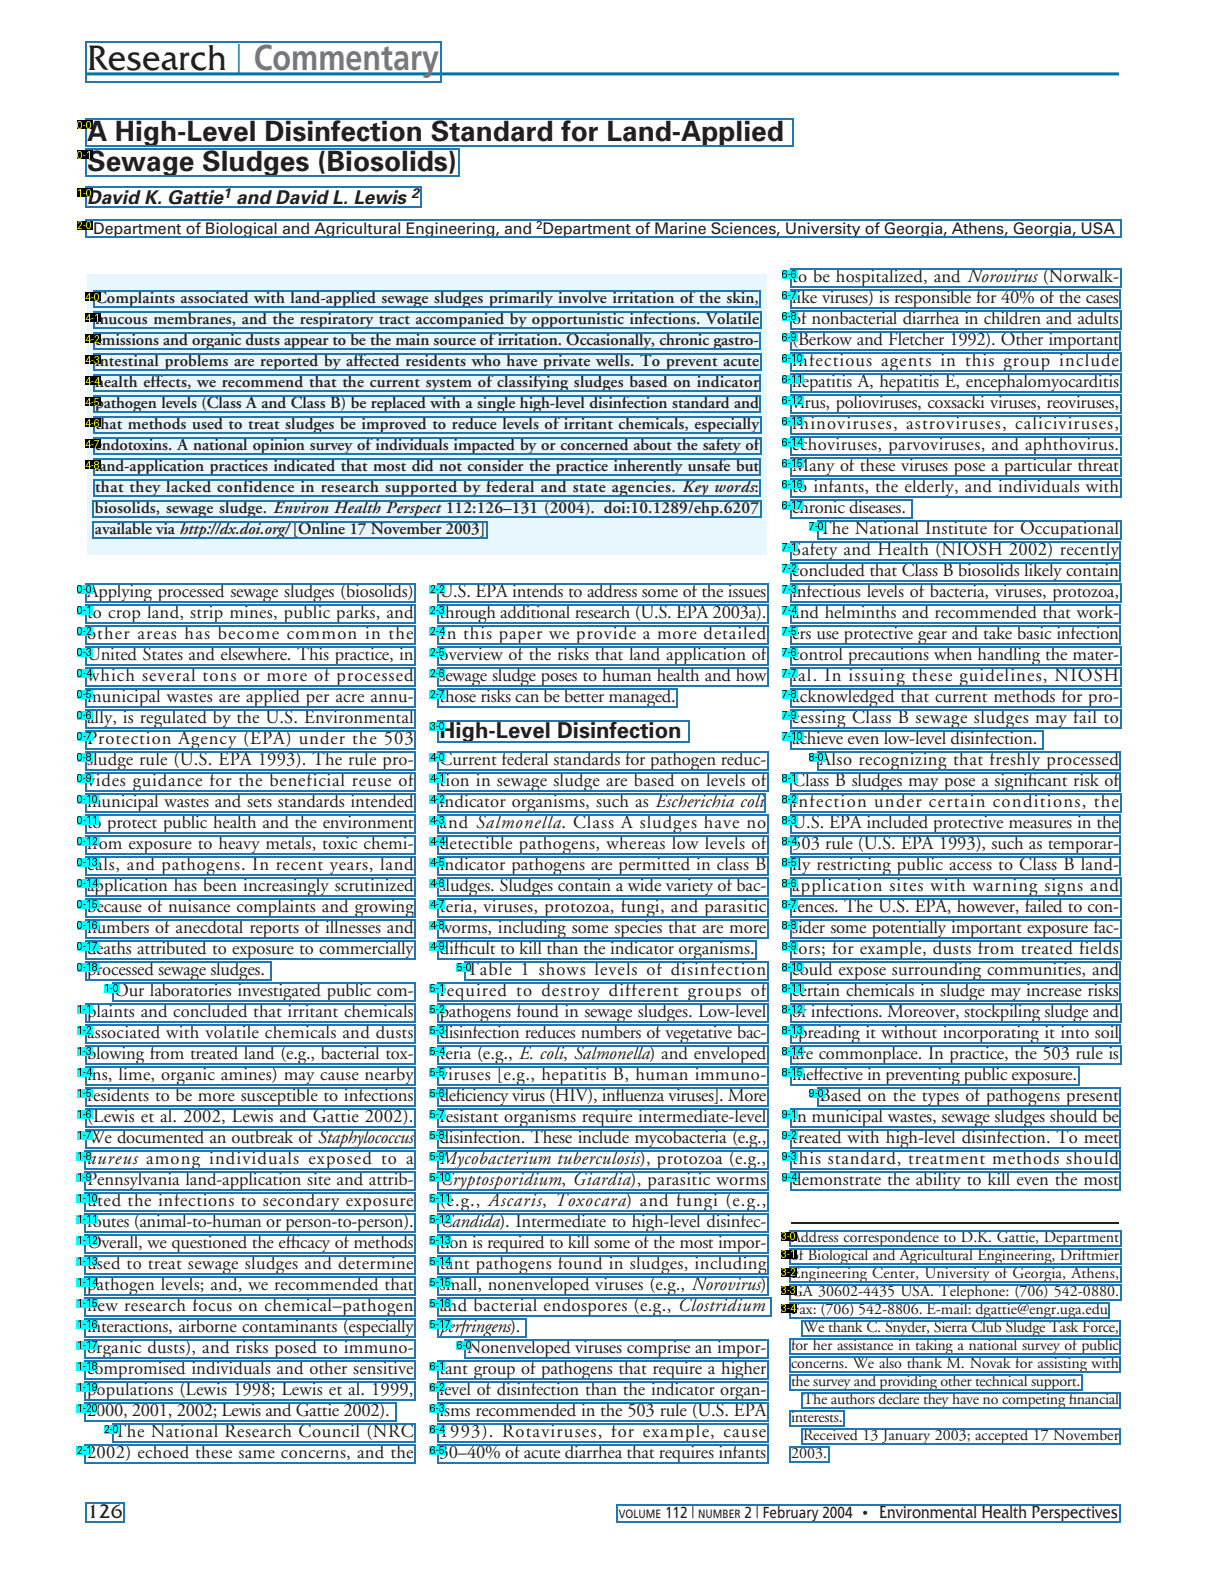

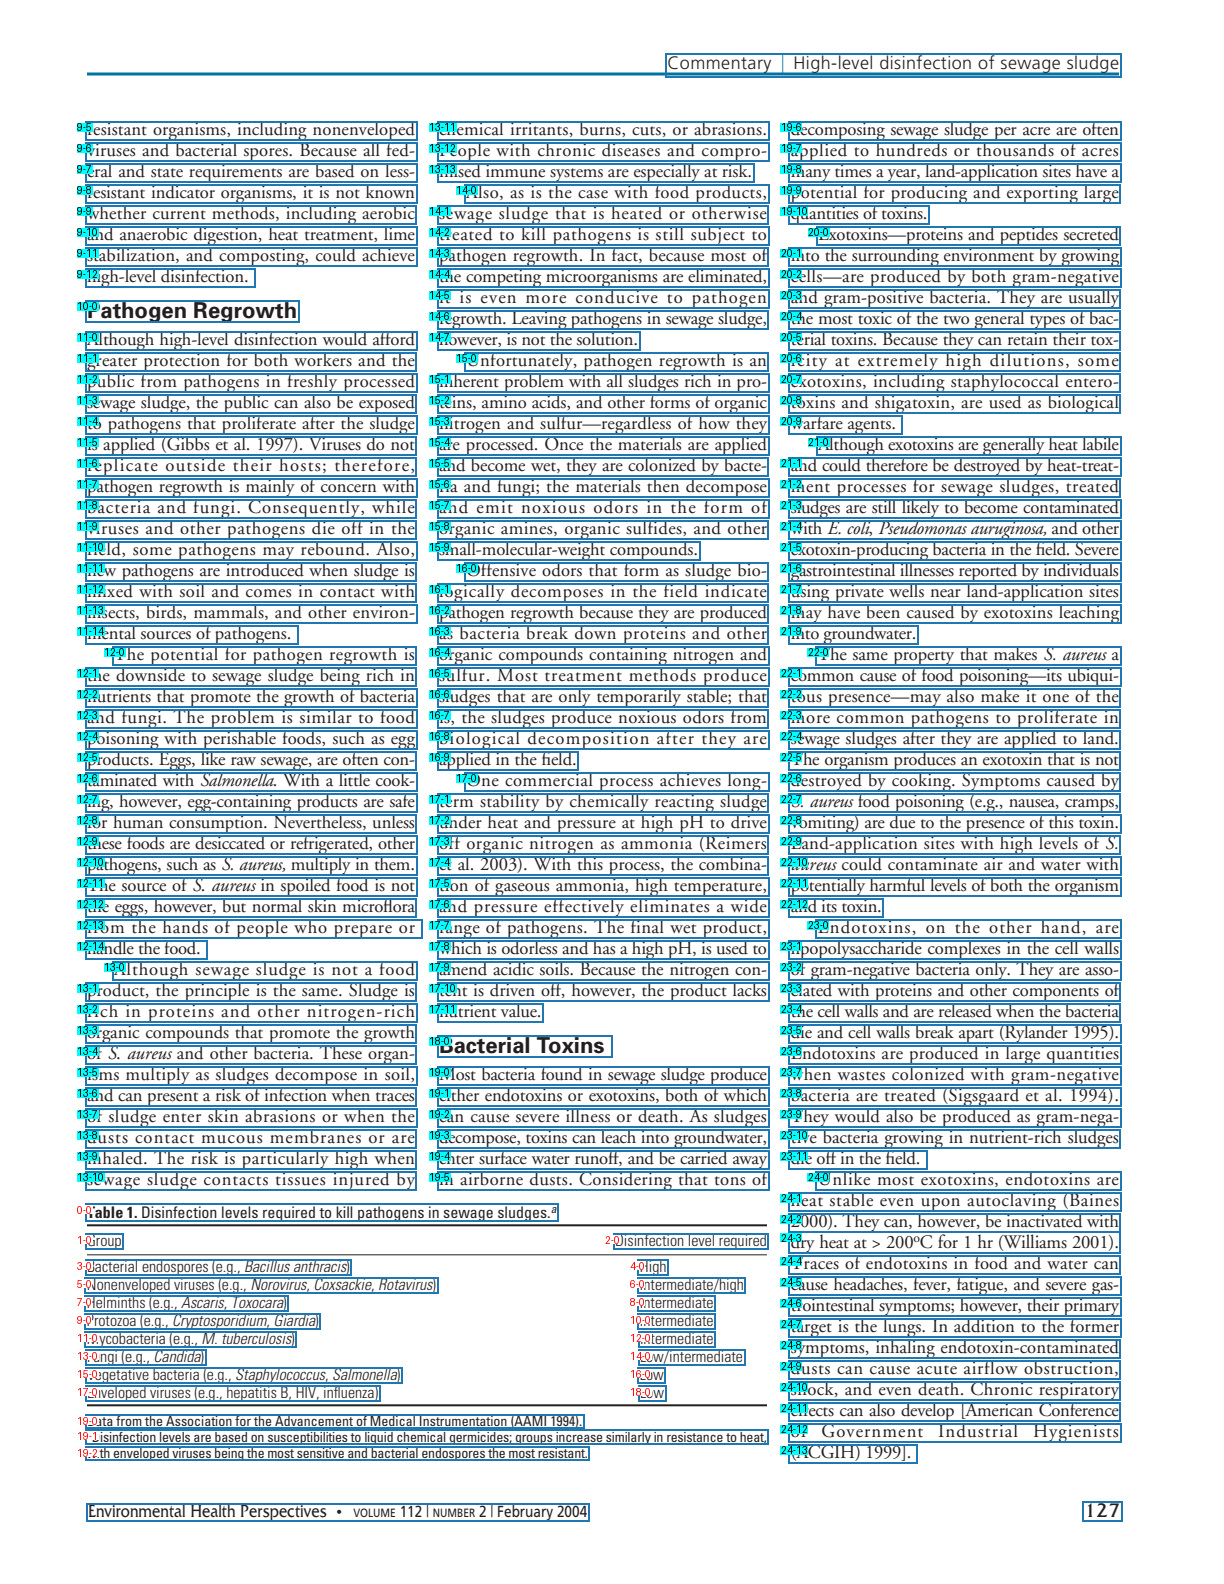

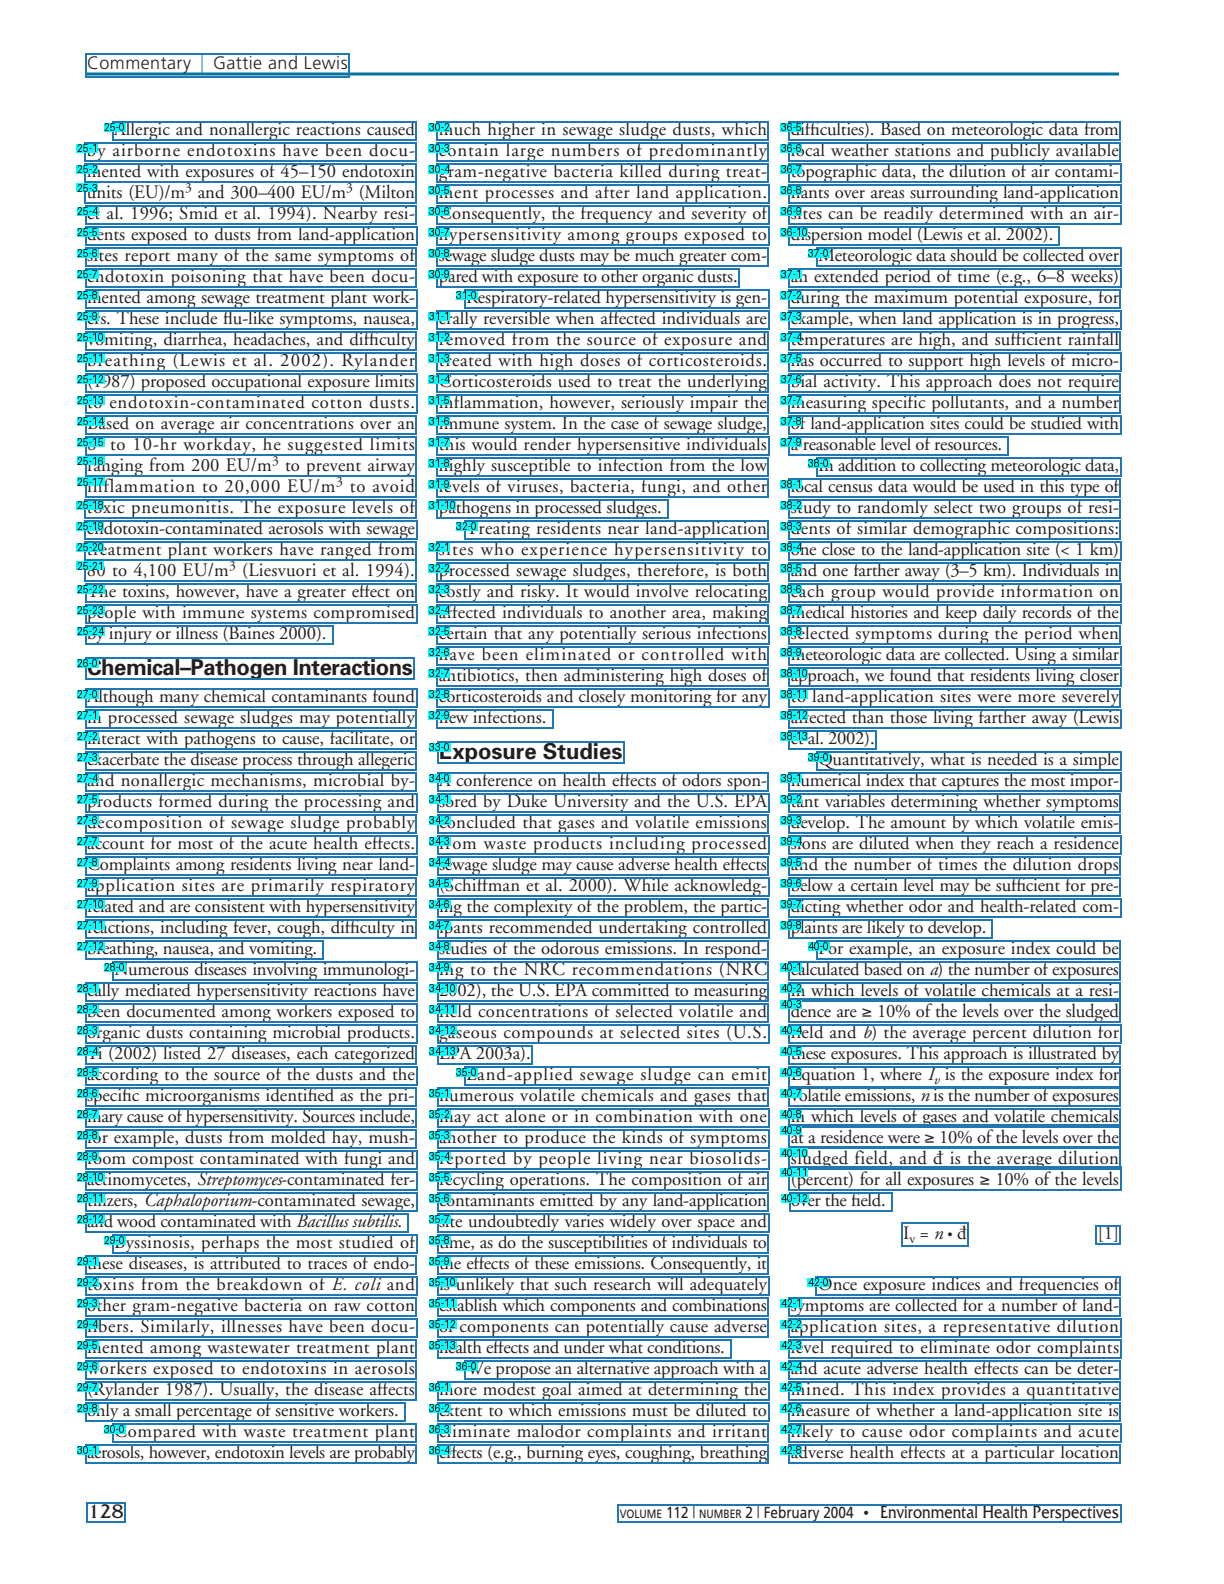

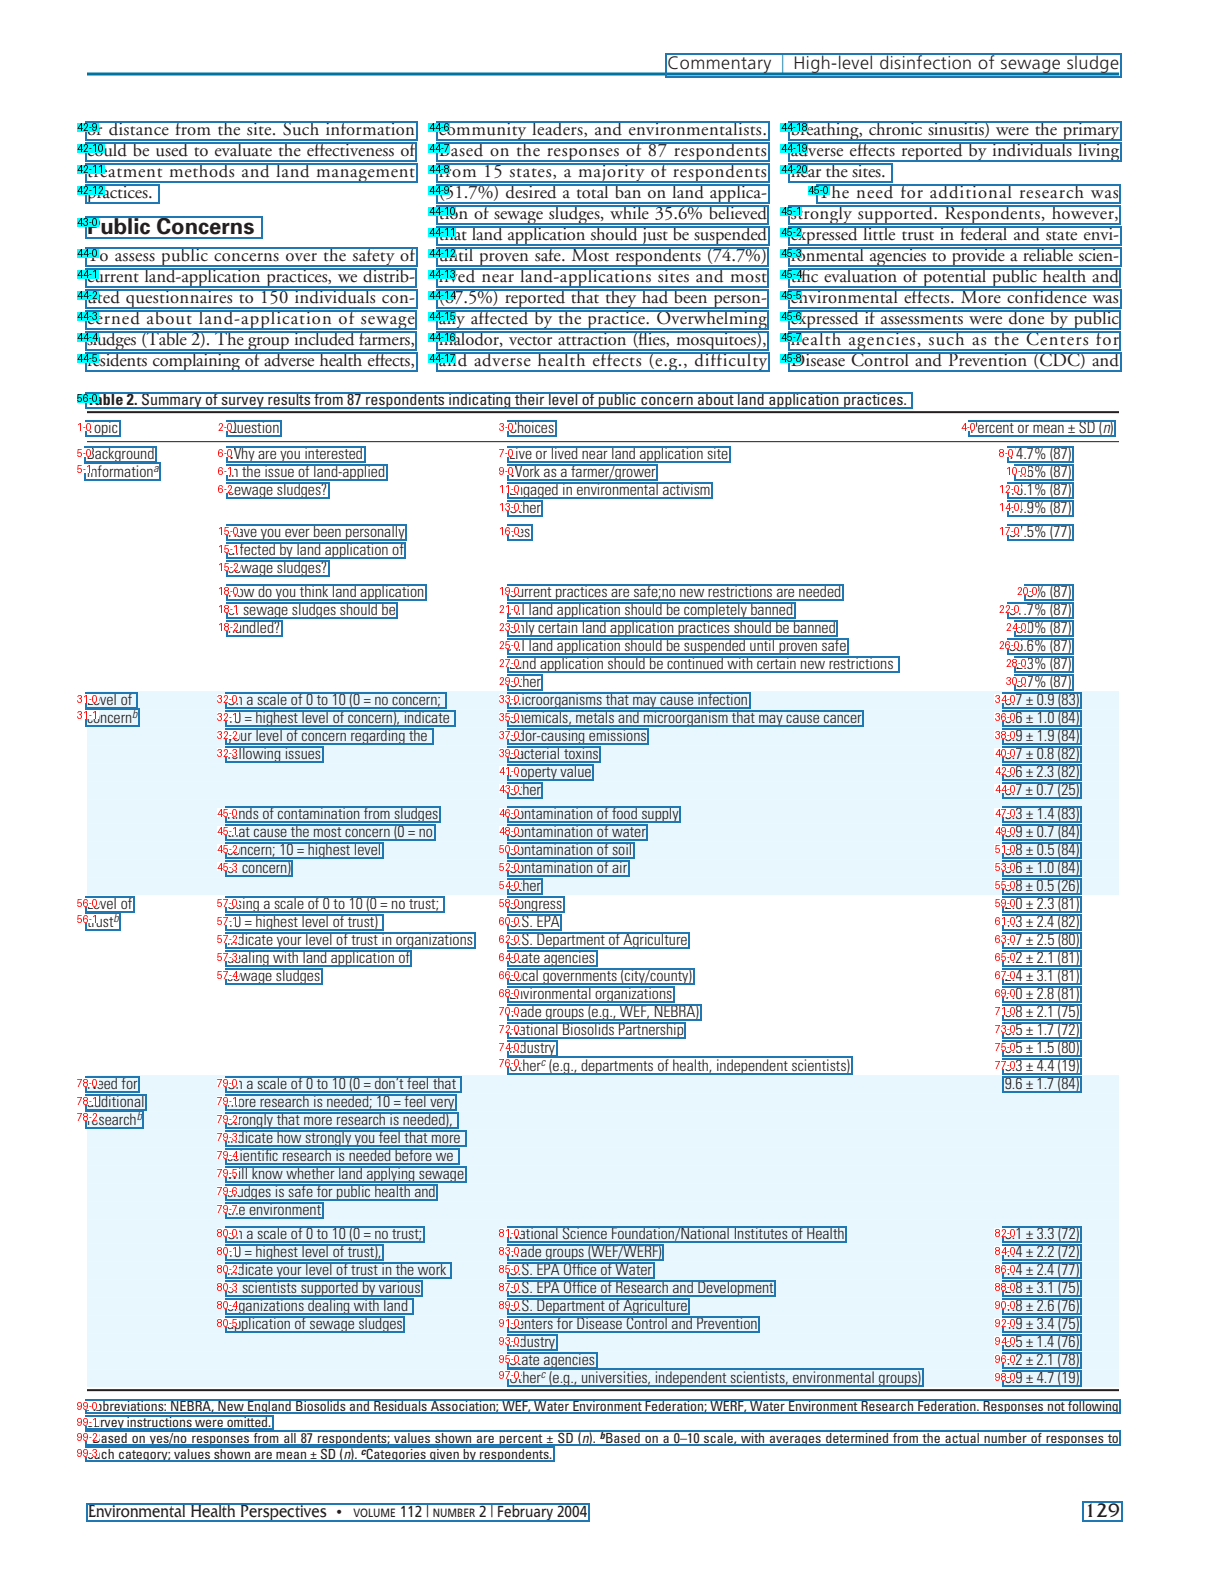

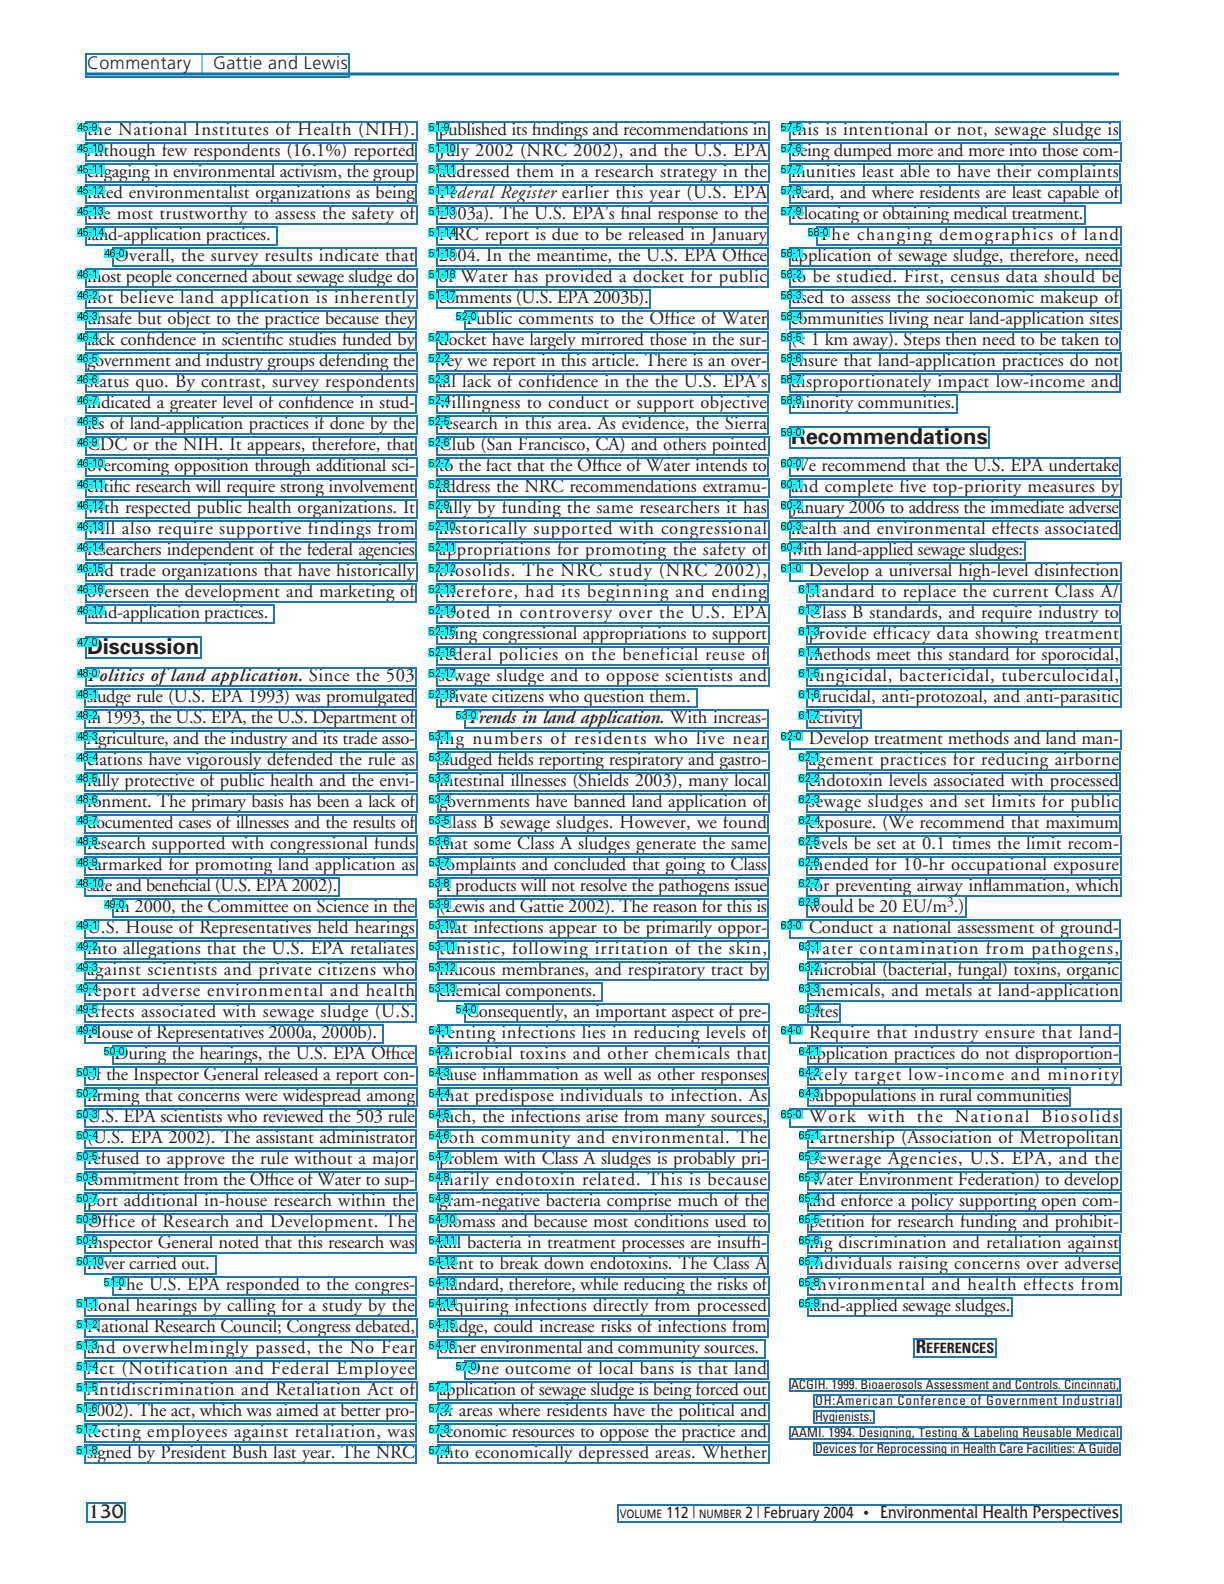

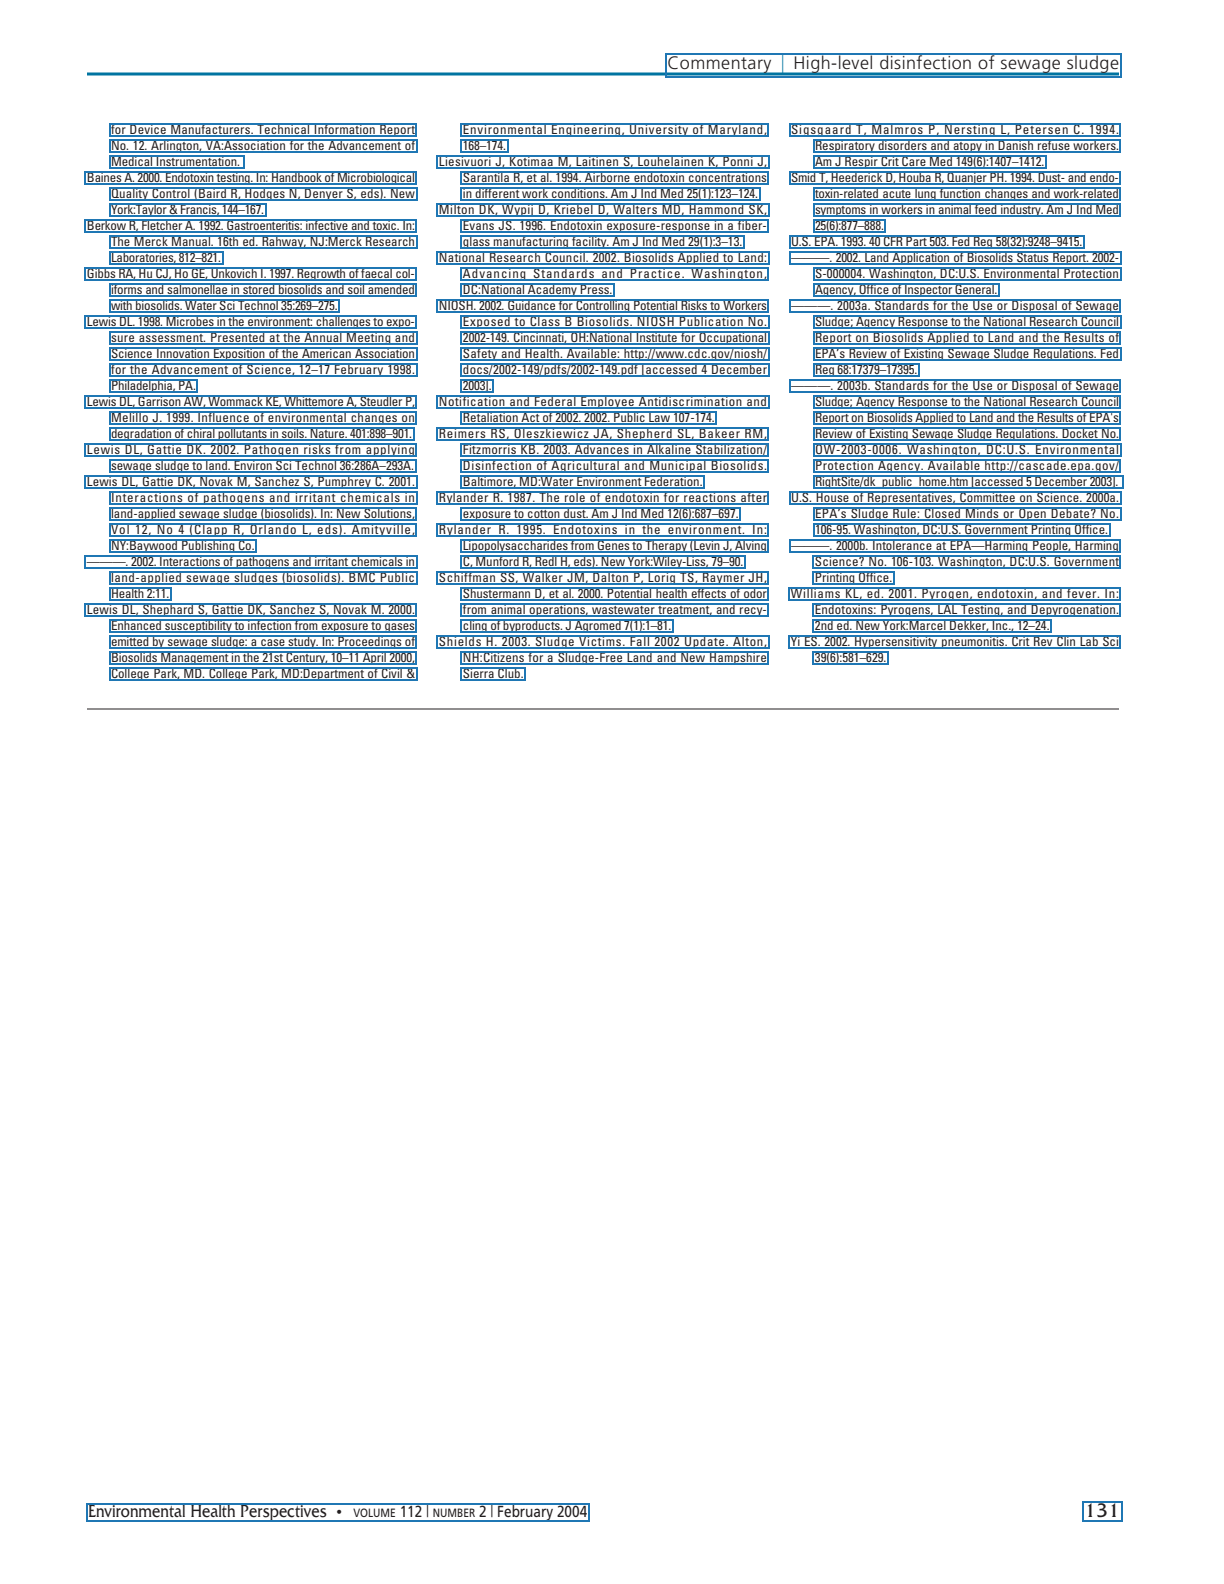

In [37]:
for page in show_annotations(doc.content, doc.content_boxes):
    display(page)

In [223]:
# debug table-wrap query


# tous les textes
qtables='//*/table-wrap | //*/table-wrap'
qtables_2='//*/label | //*/caption | //*/th | //*/td | //*/fn'
# printXPath(tree,qtables)

try:
    r=elementpath.select(tree, qtables)
    for i,x in enumerate(r):
        print(f'\nTable {i}\n')
        # printXML(x)
        print(f'type tree{type(tree)} <> type x {type(x)}')
        r2=elementpath.select(x, qtables_2)
        for i2,x2 in enumerate(r2):
            print(i2, ':', "".join(x2.itertext()))
        break # just one table
except:
    print(f"error in expression ({qtables}) ({qtables_2}) or inputfile")


Table 0

type tree<class 'lxml.etree._ElementTree'> <> type x <class 'lxml.etree._Element'>
0 : Table 1
1 : Concentrations of PCDD/F in sewage sludge, sorted by country and year.
2 : Reference
3 : Country
4 : Year
5 : Source of material
6 : n
7 : Mean concentration (pg TEQ/g)
8 : Range (pg TEQ/g)
9 : Ho and Clement 1990
10 : Canada
11 : 1986
12 : Treated municipal sludge
13 : 50
14 : NA
15 : 0.0005–0.0015
16 : 
17 : 
18 : 
19 : Raw municipal sludge
20 : 50
21 : NA
22 : 0.0026–0.0051
23 : van Oostdam and Ward 1995
24 : Canada
25 : 1990–1993
26 : Primary sludge
27 : 4
28 : 16.6 (dw)
29 : 2.3–49.6
30 : Healey and Bright 2000
31 : Canada
32 : 1998–1999
33 : Municipal wastewater treatment plants
34 : 26
35 : 40 (dw)
36 : 5.6–250
37 : Lamparski et al. 1984
38 : USA
39 : 1933
40 : Treated municipal sludge
41 : 1
42 : 87.7 (dw)
43 : 
44 : 
45 : 
46 : 1981
47 : Treated municipal sludge
48 : 1
49 : 88.9 (dw)
50 : 
51 : 
52 : 
53 : 1982
54 : Treated municipal sludge
55 : 1
56 : 80.8 (dw)
57 : 
5

In [212]:
# debug
# Not matched text boxes 


print(f'Nb text boxes not matched: {len(map_tboxes)}')

for tb in [v for _,v in map_tboxes.items()]:
    print(tb.page_num, f'{(tb.y0):.2f}', tb.text)

Nb text boxes not matched: 1331
0 0.03 Research | Review
0 0.08 Potential for Increased Human Foodborne Exposure to PCDD/F When
0 0.10 Recycling Sewage Sludge on Agricultural Land
0 0.12 Karen Rideout1,2 and Kay Teschke1,3
0 0.14 1School of Occupational and Environmental Hygiene, 2Institute for Resources, Environment and Sustainability, and 3Department of
0 0.16 Health Care and Epidemiology, University of British Columbia, Vancouver, British Columbia, Canada
0 0.44 likely to result in increased human exposure to PCDD/F. Key words: agriculture, bioaccumula-
0 0.45 tion, biosolids, dioxins, exposure assessment, food chain, furans, land recycling, PCDD/F, plant
0 0.47 uptake, sewage sludge. Environ Health Perspect 112:959–969 (2004). doi:10.1289/ehp.6802
0 0.48 available via http://dx.doi.org/ [Online 26 April 2004]
0 0.76 Address correspondence to K. Rideout, Institute for
0 0.77 Resources, Environment and Sustainability,
0 0.78 University of British Columbia, 2206 East Mall,
0 0.79 Room